In [ ]:
import tweepy, regex
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:

# Authentication credentials (replace these with your actual credentials)
consumer_key = 'sHZQZqN4F28R1ZAULjKypNoC0'
consumer_secret = 'LCIJ5wJ9Lk2wzm56cdAA9LdoK0Sa48uR1mc38SJiDbzazq6PSW'
access_token = '1900607398110273536-gRNhg1jEWnR7WiZfWOu2mGzVJGk8Dk'
access_token_secret = 'NnPj2PwAl4c3qoNy3Y7W9CNxvsHekDKnjQTFAFNnf1wmk'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAPnAzwEAAAAAfZZFhtXnW7dTaYmqC7uQOhvaz1M%3D8O2ZyuoSMrFHxHNRi4QKXRli7gbhyWl47ud97yxHtvqIeC1KQ2'  # Required for Twitter API v2

# Authenticate using OAuth 1.0a (for search_tweets method)
auth = tweepy.OAuth1UserHandler(consumer_key, consumer_secret, access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

# Authenticate using OAuth 2.0 (for better performance)
client = tweepy.Client(bearer_token=bearer_token)

In [3]:
search_term = input("Enter Keyword/Tag to search about: ")
no_of_tweets = int(input("Enter how many tweets to fetch: "))

# Fetch tweets using Tweepy v2 API
tweets = client.search_recent_tweets(query=search_term + " -is:retweet", tweet_fields=["created_at", "text"], max_results=no_of_tweets)

tweet_texts = [tweet.text for tweet in tweets.data]

# Print collected tweets
for i, tweet in enumerate(tweet_texts):
    print(f"{i+1}: {tweet}")

Enter Keyword/Tag to search about:  bix
Enter how many tweets to fetch:  15


1: @DoxxxyStocksy "Well, Bix, it was a different era of course"
2: 🔥 Big News!

#ElonMusk officially introduces the X Token.🎉

➞ 𝗽𝗶𝗻 𝗽𝗼𝘀𝘁 https://t.co/dhftMEfjZK

 @t4sharileefacer
3: 🔥 Big News!

#ElonMusk officially introduces the X Token.🎉

➞ 𝗽𝗶𝗻 𝗽𝗼𝘀𝘁 https://t.co/ohrR2BqsET

 @mandooooo_oaieeorge
4: 🔥 Big News!

#ElonMusk officially introduces the X Token.🎉

➞ 𝗽𝗶𝗻 𝗽𝗼𝘀𝘁 https://t.co/ohQ8IUZSZ6

 @kasim_moham6851
5: Ilmu kimiyabe galiwudǝ

⎐نمشؾ⎐
⊵CMM⊴

⎐بٱث⎐
⊵A4TU⊴

⎐ٺوٺ⎐
⊵SAAS⊴
bIx
6: Considering the recent passing of  Jim Sinclair...
2017: Clif High and Bix Weir attempt tp explain the viability of bitcoin and cryptocurrencies to gold bug Jim Sinclair.
https://t.co/75vdpzeH1V
7: 🔥 Big News!

#ElonMusk officially introduces the X Token.🎉

➞ 𝗽𝗶𝗻 𝗽𝗼𝘀𝘁 https://t.co/V6B15j2UwR

 @dhingra_harishhray1
8: @masterbaski Allaha her gun şükrediyoruz Ataturk gibi birini bize gonderdigi icin. Her gunde Atamiza dua ediyoruz bizi bix yaptigi icin
9: Kawu-a kuru saa-a

⎐بٱث▬اند▬بودى⎐
⊵A4TU⊴

⎐شي▬ان

                                               Tweet Sentiment
0  @DoxxxyStocksy "Well, Bix, it was a different ...   Neutral
1  🔥 Big News!\n\n#ElonMusk officially introduces...   Neutral
2  🔥 Big News!\n\n#ElonMusk officially introduces...   Neutral
3  🔥 Big News!\n\n#ElonMusk officially introduces...   Neutral
4  Ilmu kimiyabe galiwudǝ\n\n⎐نمشؾ⎐\n⊵CMM⊴\n\n⎐بٱ...   Neutral


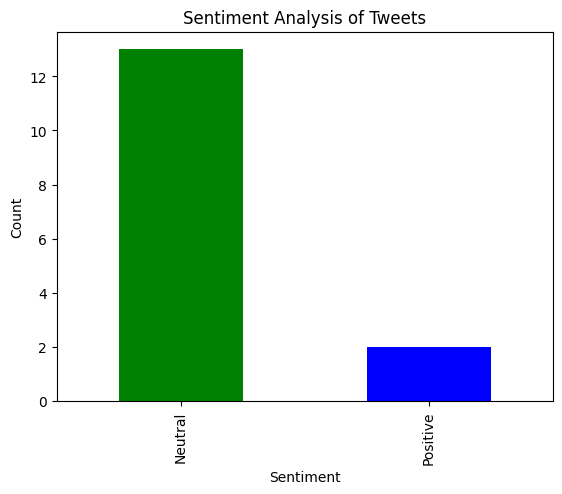

In [4]:
from textblob import TextBlob

def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity == 0:
        return "Neutral"
    else:
        return "Negative"

# Store results in a DataFrame
import pandas as pd

df = pd.DataFrame(tweet_texts, columns=["Tweet"])
df["Sentiment"] = df["Tweet"].apply(analyze_sentiment)

# Display first few rows
print(df.head())

# Plot sentiment distribution
import matplotlib.pyplot as plt

df["Sentiment"].value_counts().plot(kind="bar", color=["green", "blue", "red"])
plt.title("Sentiment Analysis of Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()